# Features Exploring

## Imports

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the 'features' table into a DataFrame
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file"""
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Connected to database")
        return True, conn
    except sqlite3.Error as e:
        print(f"Failed to connect: {e}")
        return False, None
    

# path to database file
status, conn  = create_connection("/Users/fried/Documents/DataScience/4season/DSP/Spotify/DSP_project/playlist_analysis.db")

if status:
    df_features = pd.read_sql_query("SELECT * FROM features;", conn)
else:
    print("Failed to establish a connection.")

# Display first few rows of the DataFrame to get an overview
df_features.head()

Connected to database


,t_uri,acousticness,danceability,t_duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,spotify:track:0007AYhg2UQbEm88mxu7js,0.1640,0.648,198000,0.5980,0.000046,7,0.1230,-11.845,1,0.3260,138.883,4,0.400
1,spotify:track:000CTwOSsvRs0bgXlwB64e,0.0664,0.877,155238,0.7240,0.000000,7,0.0801,-7.378,1,0.2050,104.024,4,0.515
2,spotify:track:000GjfnQc7ggBayDiy1sLW,0.0745,0.913,140360,0.7480,0.000956,9,0.0403,-3.274,1,0.0428,114.143,4,0.864
3,spotify:track:000JBgYWfJQqdFaRqu2n3f,0.9790,0.496,227627,0.0481,0.767000,7,0.1100,-26.668,0,0.0520,79.477,4,0.125
4,spotify:track:000ULyVqUhqnAyA0Um3MEH,0.5090,0.557,251000,0.7310,0.000000,7,0.2670,-5.557,1,0.1400,118.960,4,0.902


In [3]:
missing = df_features.isnull().sum()
print(missing)

t_uri               0
acousticness        0
danceability        0
t_duration_ms       0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


## Statistics of the features

In [4]:
df_features.describe()

,acousticness,danceability,t_duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,301545.000000,301545.000000,3.015450e+05,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000
mean,0.300412,0.564159,2.407267e+05,0.615033,0.146077,5.253063,0.203609,-8.495913,0.659271,0.087874,120.826521,3.905112,0.470279
std,0.326362,0.175332,1.102750e+05,0.247393,0.295944,3.571795,0.180150,4.822996,0.473955,0.102617,29.510038,0.416629,0.256793
min,0.000000,0.000000,2.000000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019200,0.450000,1.915300e+05,0.447000,0.000000,2.000000,0.096200,-10.320000,0.000000,0.034800,97.917000,4.000000,0.259000
50%,0.152000,0.576000,2.256670e+05,0.653000,0.000069,5.000000,0.127000,-7.272000,1.000000,0.047100,120.050000,4.000000,0.457000
75%,0.550000,0.693000,2.694590e+05,0.819000,0.047100,8.000000,0.257000,-5.306000,1.000000,0.088100,139.853000,4.000000,0.674000
max,0.996000,0.991000,5.279768e+06,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,0.965000,247.938000,5.000000,1.000000


In [5]:
# Convert 't_duration_ms' to seconds
df_features['t_duration_sec'] = df_features['t_duration_ms'] / 1000

# Drop the original 't_duration_ms' column
df_features.drop('t_duration_ms', axis=1, inplace=True)

# Show the first few rows of the updated DataFrame
df_features.describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,t_duration_sec
count,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000,301545.000000
mean,0.300412,0.564159,0.615033,0.146077,5.253063,0.203609,-8.495913,0.659271,0.087874,120.826521,3.905112,0.470279,240.726716
std,0.326362,0.175332,0.247393,0.295944,3.571795,0.180150,4.822996,0.473955,0.102617,29.510038,0.416629,0.256793,110.274968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.019200,0.450000,0.447000,0.000000,2.000000,0.096200,-10.320000,0.000000,0.034800,97.917000,4.000000,0.259000,191.530000
50%,0.152000,0.576000,0.653000,0.000069,5.000000,0.127000,-7.272000,1.000000,0.047100,120.050000,4.000000,0.457000,225.667000
75%,0.550000,0.693000,0.819000,0.047100,8.000000,0.257000,-5.306000,1.000000,0.088100,139.853000,4.000000,0.674000,269.459000
max,0.996000,0.991000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,0.965000,247.938000,5.000000,1.000000,5279.768000


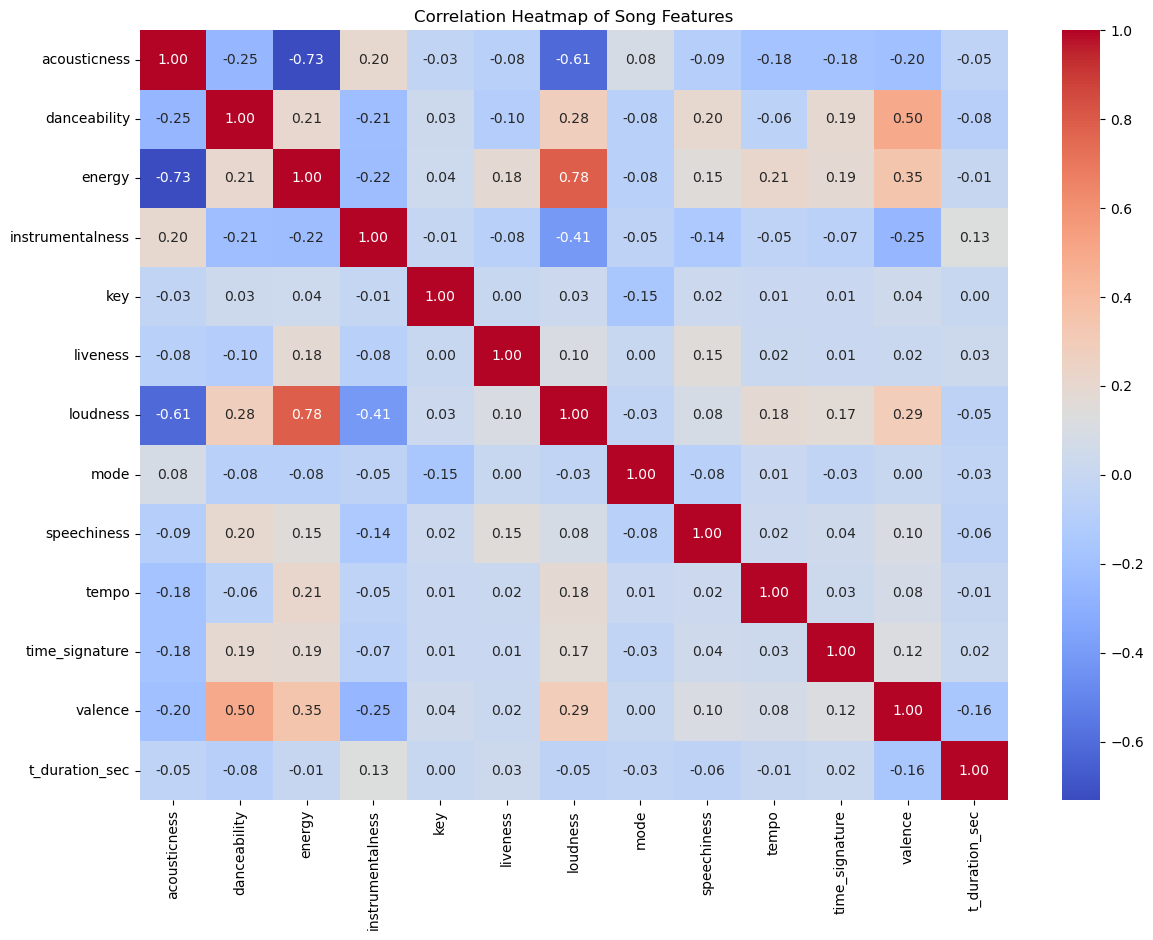

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 't_uri' column from the DataFrame
df_features_dropped = df_features.drop(columns=['t_uri'])

# Generate the heatmap to visualize correlations
plt.figure(figsize=(14, 10))
sns.heatmap(df_features_dropped.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Song Features")
plt.show()

- __energy__ und __loudness__ haben eine hohe positive Korrelation, was zu erwarten ist.
- __acousticness__ hat eine hohe negative Korrelation mit __energy und loudness__.
- __danceability__ und __valence__ sind mäßig positiv korreliert.
- __tempo__ zeigt keine starke Korrelation zu den anderen Merkmalen.

## Clustering

c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

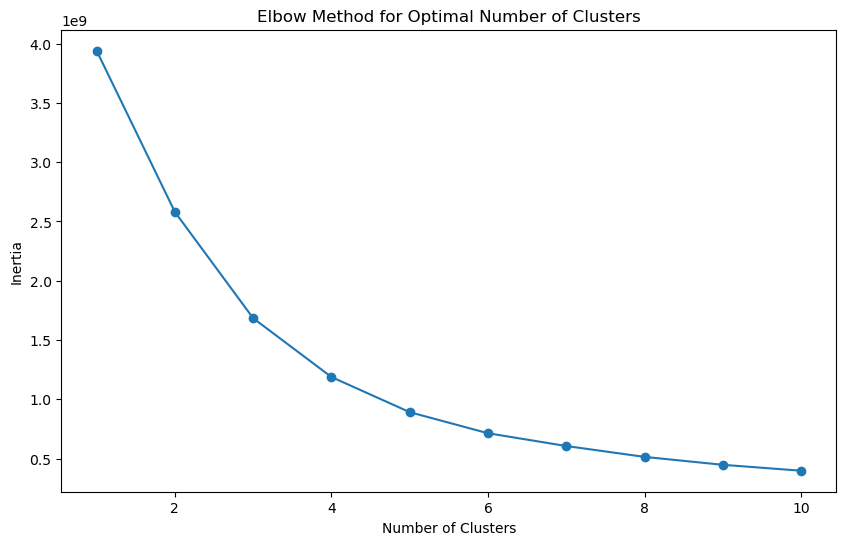

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store the inertia values for each cluster number
inertia_values = []

# Initialize the range for the number of clusters (from 1 to 10)
cluster_range = range(1, 11)

# Loop through each number of clusters and fit the K-means model
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_features_dropped)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the features for clustering
features_to_cluster = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df_features_cluster = df_features[features_to_cluster]

# Standardize the features
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features_cluster)

# Perform K-means clustering
k = 5  # number of clusters
kmeans_model = KMeans(n_clusters=k, random_state=42)
df_features['cluster'] = kmeans_model.fit_predict(df_features_scaled)

df_features.head(25)


c:\Users\fried\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,t_uri,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,t_duration_sec,cluster
0,spotify:track:0007AYhg2UQbEm88mxu7js,0.164000,0.648,0.5980,0.000046,7,0.1230,-11.845,1,0.3260,138.883,4,0.4000,198.000,0
1,spotify:track:000CTwOSsvRs0bgXlwB64e,0.066400,0.877,0.7240,0.000000,7,0.0801,-7.378,1,0.2050,104.024,4,0.5150,155.238,1
2,spotify:track:000GjfnQc7ggBayDiy1sLW,0.074500,0.913,0.7480,0.000956,9,0.0403,-3.274,1,0.0428,114.143,4,0.8640,140.360,1
3,spotify:track:000JBgYWfJQqdFaRqu2n3f,0.979000,0.496,0.0481,0.767000,7,0.1100,-26.668,0,0.0520,79.477,4,0.1250,227.627,2
4,spotify:track:000ULyVqUhqnAyA0Um3MEH,0.509000,0.557,0.7310,0.000000,7,0.2670,-5.557,1,0.1400,118.960,4,0.9020,251.000,1
5,spotify:track:000VZqvXwT0YNqKk7iG2GS,0.000085,0.444,0.9910,0.000084,7,0.1200,-4.167,1,0.1330,124.016,4,0.1060,256.478,4
6,spotify:track:000mA0etY38nKdvf1N04af,0.243000,0.303,0.6160,0.000003,10,0.1340,-8.468,1,0.0373,78.673,4,0.2190,214.507,3
7,spotify:track:000x2qE0ZI3hodeVrnJK8A,0.339000,0.507,0.3560,0.000000,0,0.1800,-14.240,1,0.0306,134.248,4,0.4720,200.627,3
8,spotify:track:000xQL6tZNLJzIrtIgxqSl,0.131000,0.748,0.6270,0.000000,7,0.0852,-6.029,1,0.0639,120.963,4,0.5240,188.491,1
9,spotify:track:0010mZpCCwlPwoBiBsjoac,0.108000,0.527,0.7930,0.000003,3,0.1440,-4.823,1,0.0352,124.993,3,0.5970,249.947,1


In [9]:
def model_tuning_song_features(initializations, n_inits, max_iters, df_features_scaled):
    results = []  # Initialize an empty list to store the results

    for init in initializations:
        for n_init in n_inits:
            for max_iter in max_iters:
                
                # Initialize the K-means model with the given set of parameters
                kmeans_model = KMeans(n_clusters=4, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
                
                # Fit the model to the data
                kmeans_model.fit(df_features_scaled)
                
                # Retrieve the inertia (cost) of the model
                inertia = kmeans_model.inertia_
                
                # Store the results
                new_row = {'Initialization': init, 'N_Init': n_init, 'Max_Iter': max_iter, 'Inertia': inertia}
                results.append(new_row)
                
    # Convert the list of dictionaries to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# Call the function
initializations = ['k-means++', 'random']
n_inits = [5, 10, 20, 30]
max_iters = [100, 300, 500, 1000]

results_df = model_tuning_song_features(initializations, n_inits, max_iters, df_features_scaled)

# Display the results
print("Model Tuning Results:")
print(results_df.sort_values(by='Inertia'))

# Select the model with the lowest inertia as the optimal model
optimal_params = results_df.loc[results_df['Inertia'].idxmin()]
print(f"Optimal Parameters: {optimal_params}")

Model Tuning Results:
   Initialization  N_Init  Max_Iter       Inertia
29         random      30       300  1.690416e+06
31         random      30      1000  1.690416e+06
28         random      30       100  1.690416e+06
27         random      20      1000  1.690416e+06
26         random      20       500  1.690416e+06
25         random      20       300  1.690416e+06
24         random      20       100  1.690416e+06
23         random      10      1000  1.690416e+06
22         random      10       500  1.690416e+06
21         random      10       300  1.690416e+06
20         random      10       100  1.690416e+06
19         random       5      1000  1.690416e+06
18         random       5       500  1.690416e+06
17         random       5       300  1.690416e+06
16         random       5       100  1.690416e+06
30         random      30       500  1.690416e+06
15      k-means++      30      1000  1.690427e+06
13      k-means++      30       300  1.690427e+06
12      k-means++      30   

In [10]:
# Perform K-means clustering on the scaled features
optimal_k = 5  
optimal_init = 'random' 
optimal_n_init = 20  
optimal_max_iter = 500

kmeans_model = KMeans(n_clusters=optimal_k, init=optimal_init, n_init=optimal_n_init, max_iter=optimal_max_iter, random_state=42)

# Fit the model and predict cluster labels
df_features['cluster'] = kmeans_model.fit_predict(df_features_scaled)

# Show a sample of songs with their cluster labels
df_features.sample(25)


,t_uri,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,t_duration_sec,cluster
96779,spotify:track:2UIxlbf3p2Fhknmq6WRHHQ,0.549000,0.498,0.4590,0.000018,1,0.0903,-8.166,1,0.0293,116.031,4,0.1720,312.107,4
107895,spotify:track:2m5LN2yzMDaPxip3oeblB1,0.068600,0.616,0.7500,0.000000,11,0.2350,-3.610,0,0.0741,128.005,4,0.3710,177.250,0
213506,spotify:track:5VpSolljHRw0mTWOMNMYL4,0.017000,0.564,0.7650,0.000000,0,0.3570,-5.457,1,0.1240,123.056,4,0.1760,217.402,0
107804,spotify:track:2lwkf3MVqTYmo5NoAoWFqN,0.250000,0.401,0.8500,0.342000,11,0.1070,-6.083,0,0.0581,83.027,4,0.8630,330.653,3
6757,spotify:track:0AYDFoWe1bRnAmHrK1gA69,0.526000,0.465,0.3830,0.000000,6,0.1110,-9.433,1,0.0278,83.019,4,0.3170,249.067,4
158498,spotify:track:45Y9GLCmq4sFDm6V1fvQIo,0.013400,0.465,0.5400,0.000000,0,0.2030,-5.876,0,0.0568,122.041,4,0.1690,252.040,0
61301,spotify:track:1Zhbe6voUS03JJxMxQRJAS,0.415000,0.967,0.7530,0.000000,7,0.2840,-7.592,1,0.0541,122.698,4,0.7500,207.293,3
253978,spotify:track:6Yrvi0X5sOVrfITFBnMQFl,0.728000,0.732,0.7030,0.000167,11,0.7060,-11.134,0,0.0787,107.060,4,0.6650,161.786,3
163154,spotify:track:4CzzXgQrNqMqgfrcn02d0S,0.973000,0.227,0.1340,0.000207,10,0.1210,-20.759,1,0.0457,96.696,4,0.1440,310.000,1
296658,spotify:track:7sIJurQFDVeB1goiNpVTCo,0.927000,0.268,0.1530,0.933000,0,0.1920,-20.649,1,0.0434,144.332,3,0.2350,119.552,1


Cluster Summary:
         acousticness  danceability    energy  instrumentalness       key  \
cluster                                                                     
0            0.080562      0.477526  0.781712          0.149884  5.245426   
1            0.785766      0.364391  0.227934          0.790450  4.914750   
2            0.230132      0.673188  0.671280          0.023250  5.429511   
3            0.178776      0.693599  0.707608          0.083923  5.386668   
4            0.656611      0.504556  0.350948          0.034648  5.097359   

         liveness   loudness      mode  speechiness       tempo  \
cluster                                                           
0        0.274287  -6.011395  0.651550     0.069009  134.796380   
1        0.147703 -18.520238  0.647705     0.046816  107.230406   
2        0.261307  -7.559715  0.575254     0.348123  118.841134   
3        0.159202  -6.849084  0.637618     0.066599  117.095043   
4        0.171564 -11.157678  0.751154   

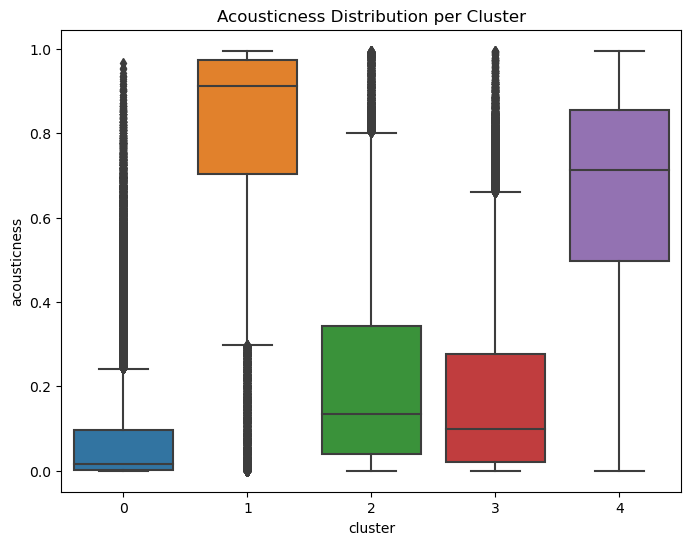

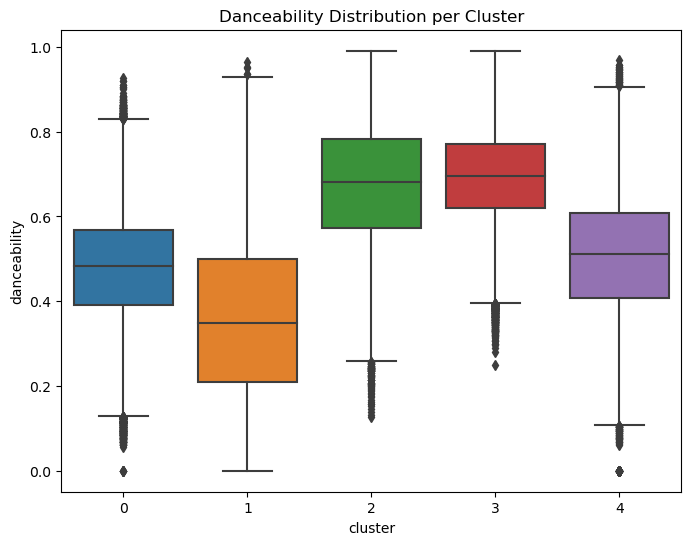

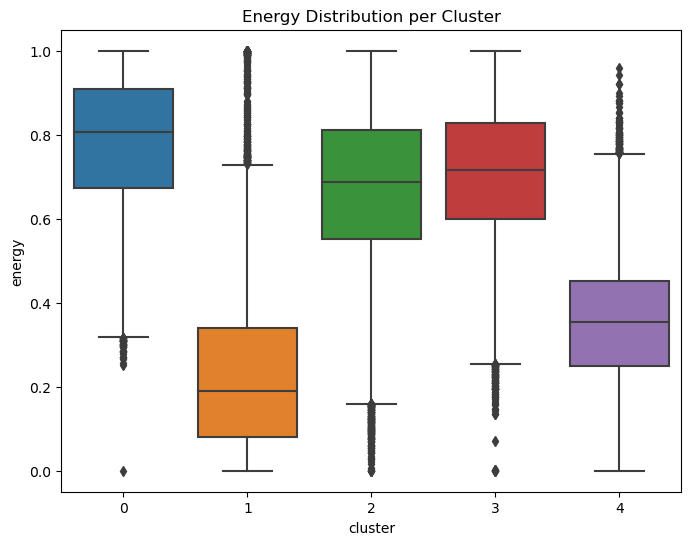

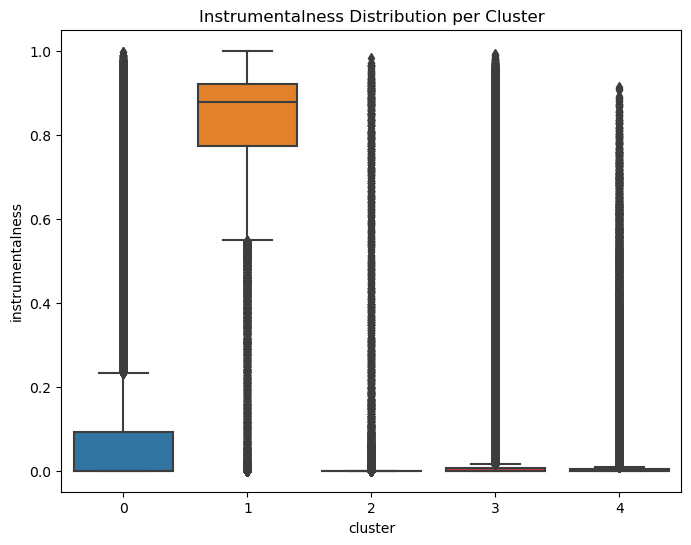

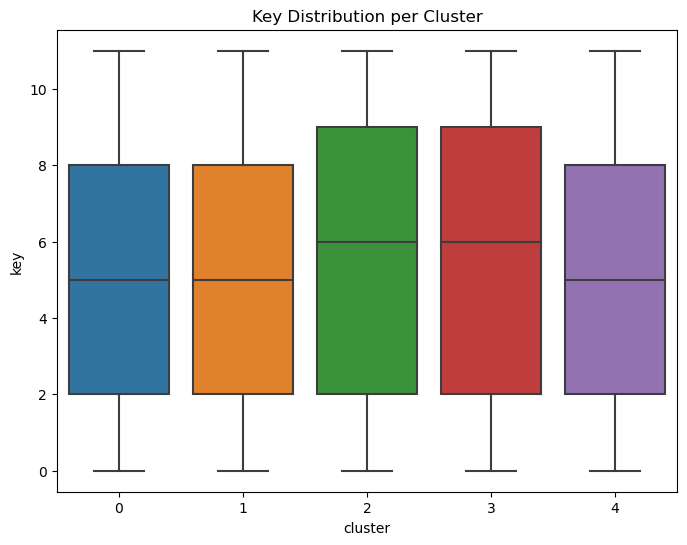

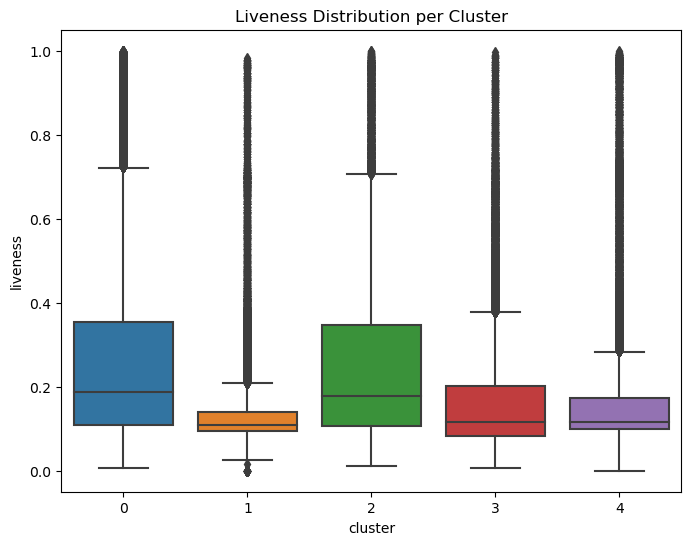

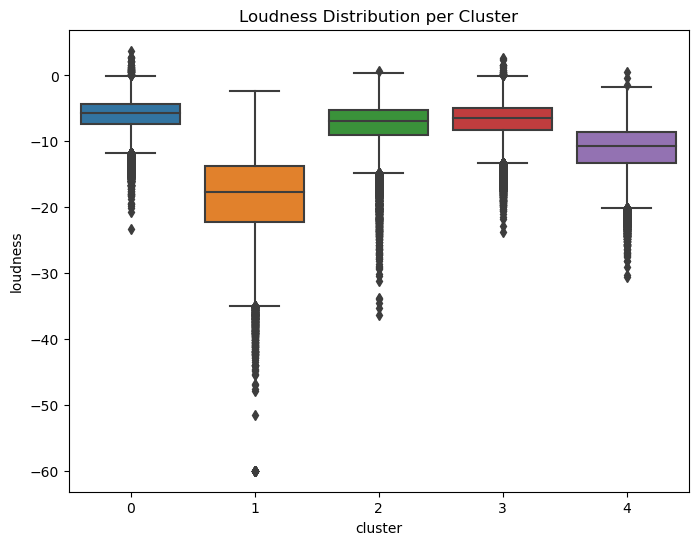

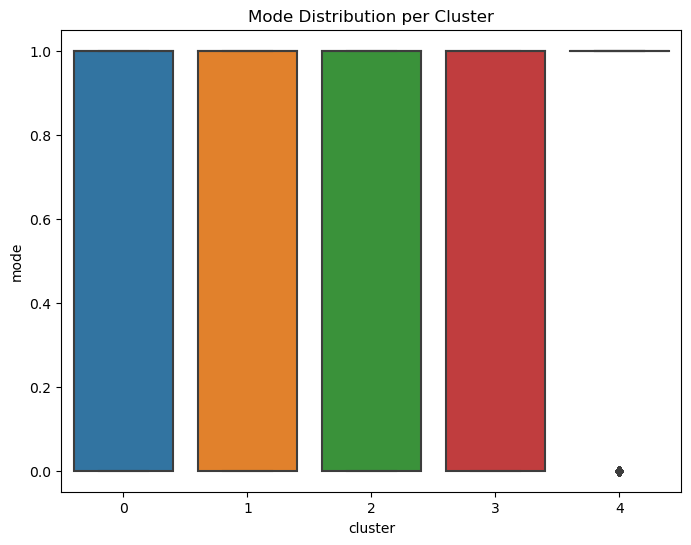

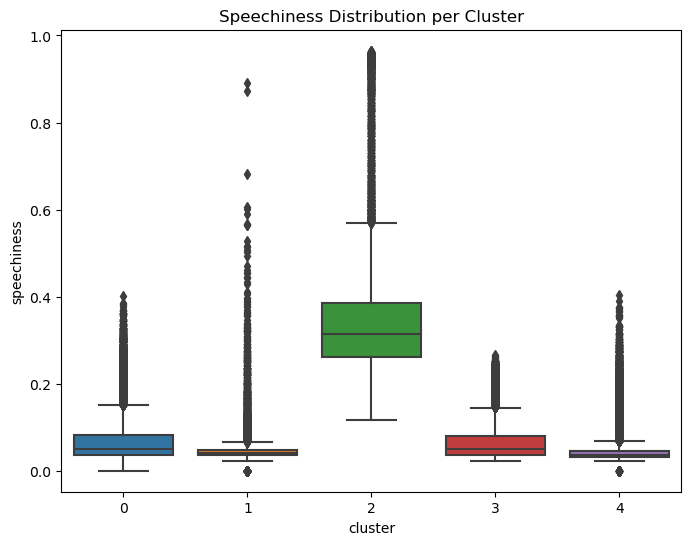

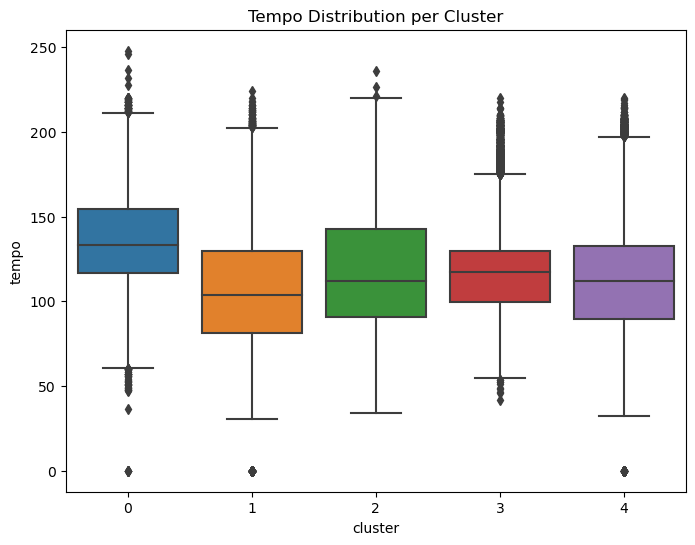

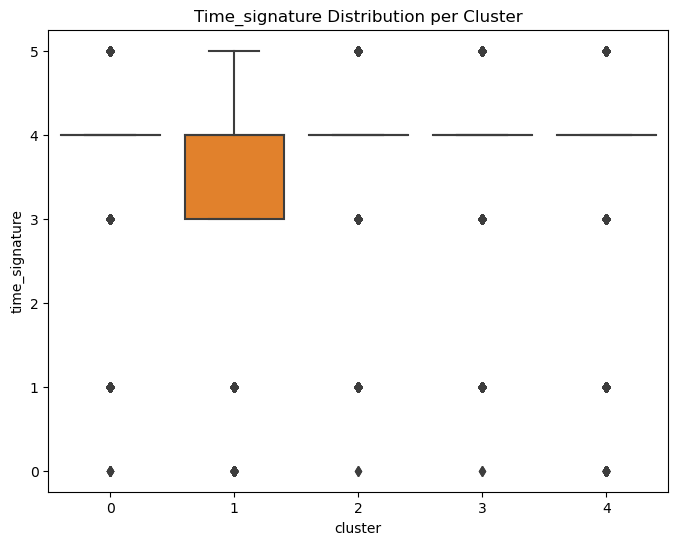

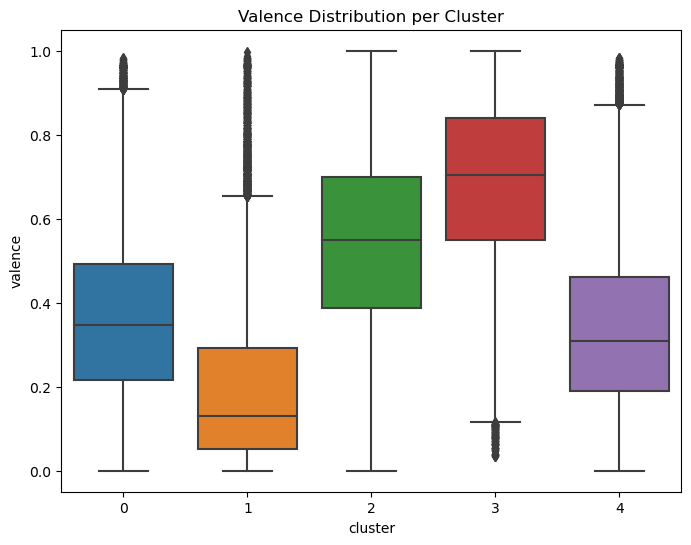

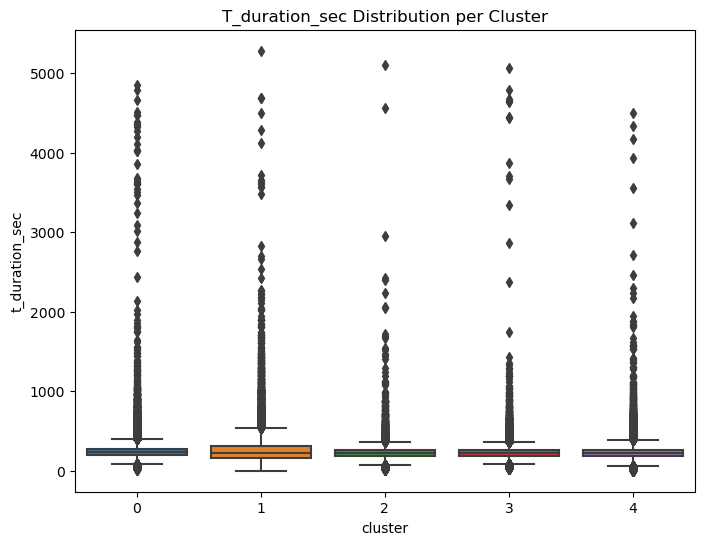

In [11]:
# Calculate the mean of each feature for each cluster
try:
    numeric_columns = df_features.select_dtypes(include=[np.number]).columns.tolist()
    cluster_summary = df_features.groupby('cluster')[numeric_columns].mean()
    print("Cluster Summary:")
    print(cluster_summary)
except Exception as e:
    print(f"An error occurred: {e}")

# Let's plot the feature distribution in each cluster
try:
    for feature in numeric_columns:
        if feature != 'cluster':  # Exclude the 'cluster' column from plotting
            plt.figure(figsize=(8, 6))
            sns.boxplot(x='cluster', y=feature, data=df_features)
            plt.title(f'{feature.capitalize()} Distribution per Cluster')
            plt.show()
except Exception as e:
    print(f"An error occurred while plotting: {e}")

In [12]:
summary_stats = df_features.groupby('cluster')[numeric_columns].agg(['min', 'max', 'mean', 'std'])
summary_stats.head()

acousticness                            danceability                   \
                 min    max      mean       std          min    max      mean   
cluster                                                                         
0           0.000000  0.966  0.080562  0.135649        0.000  0.927  0.477526   
1           0.000000  0.996  0.785766  0.271109        0.000  0.965  0.364391   
2           0.000008  0.995  0.230132  0.246700        0.126  0.990  0.673188   
3           0.000001  0.996  0.178776  0.200486        0.250  0.991  0.693599   
4           0.000000  0.996  0.656611  0.243211        0.000  0.970  0.504556   

                     energy         ...   valence           t_duration_sec  \
              std       min    max  ...      mean       std            min   
cluster                             ...                                      
0        0.132165  0.000179  1.000  ...  0.364025  0.189929          8.000   
1        0.185661  0.000000  1.000  ...  0.204945  0.200132          2.000   
2        0.143084  0.000020  1.000  ...  0.540284  0.209226         15.053   
3        0.107253  0.000229  1.000  ...  0.685045  0.190543         19.267   
4        0.144454  0.000000  0.958  ...  0.341209  0.195413          3.056   

                                          cluster                
              max        mean         std     min max mean  std  
cluster                                                          
0        4844.201  252.868988  113.638291       0   0  0.0  0.0  
1        5279.768  262.505576  199.060138       1   1  1.0  0.0  
2        5100.018  225.237973   94.336301       2   2  2.0  0.0  
3        5062.000  232.459870   83.046605       3   3  3.0  0.0  
4        4497.994  235.142825   96.729830       4   4  4.0  0.0  

[5 rows x 56 columns]

In [13]:
# load the 'tracks' table into a DataFrame
df_tracks = pd.read_sql_query("SELECT * FROM tracks;", conn)

# load artists table into a DataFrame
df_artists = pd.read_sql_query("SELECT * FROM artists;", conn)

# Join tracks and features on t_uri
df_tracks_features = pd.merge(df_tracks, df_features, on='t_uri', how='inner')

# Join the resulting DataFrame with artists on artist_uri
df_final = pd.merge(df_tracks_features, df_artists, left_on='artist_uri', right_on='artist_uri', how='inner')

df_final

,t_uri,t_name,t_duration_ms,artist_uri,album_uri,popularity_x,explicit,preview_url,acousticness,danceability,...,speechiness,tempo,time_signature,valence,t_duration_sec,cluster,artist_name,popularity_y,followers,genres
0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),226863,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,67.0,1.0,https://p.scdn.co/mp3-preview/253a76c453026570...,0.0311,0.904,...,0.1210,125.461,4,0.810,226.864,3,Missy Elliott,74.0,2180138.0,"dance pop, hip hop, hip pop, pop rap, r&b, rap..."
1,spotify:track:3jagJCUbdqhDSPuxP8cAqF,Work It,263226,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6DeU398qrJ1bLuryetSmup,69.0,1.0,https://p.scdn.co/mp3-preview/590b9c7307f4a385...,0.0778,0.884,...,0.2830,101.868,4,0.584,263.227,2,Missy Elliott,74.0,2180138.0,"dance pop, hip hop, hip pop, pop rap, r&b, rap..."
2,spotify:track:3XplJgPz8VjbDzbGwGgZdq,Get Ur Freak On,236933,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6epR3D622KWsnuHye7ApOl,44.0,1.0,https://p.scdn.co/mp3-preview/e78539eb295a62a5...,0.5380,0.794,...,0.2300,177.799,4,0.658,236.933,2,Missy Elliott,74.0,2180138.0,"dance pop, hip hop, hip pop, pop rap, r&b, rap..."
3,spotify:track:0jG92AlXau21qgCQRxGLic,One Minute Man (feat. Ludacris),252986,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:20t54K6C80QQH7vbcpfJcP,55.0,1.0,https://p.scdn.co/mp3-preview/bfe9e507e4b0133d...,0.0266,0.622,...,0.3290,93.839,4,0.570,252.987,2,Missy Elliott,74.0,2180138.0,"dance pop, hip hop, hip pop, pop rap, r&b, rap..."
4,spotify:track:6zsk6uF3MxfIeHPlubKBvR,Get Ur Freak On,211120,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:20t54K6C80QQH7vbcpfJcP,69.0,1.0,https://p.scdn.co/mp3-preview/f19dd549102d9820...,0.5330,0.797,...,0.2470,177.870,4,0.740,211.120,2,Missy Elliott,74.0,2180138.0,"dance pop, hip hop, hip pop, pop rap, r&b, rap..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301540,spotify:track:0viFCuoqfa09dsDlqqpDQ6,Star Spangled Banner,92379,spotify:artist:3PEYBoBKfK6psvKymJvdys,spotify:album:7DWwPW0eIkuAEhz7CPAw7p,0.0,0.0,None,0.6450,0.416,...,0.0288,74.861,3,0.594,92.380,4,American Patriots,0.0,61.0,
301541,spotify:track:4fpBScmmd5Iz7dTeepsatD,Sweet Summer Time,205693,spotify:artist:5XFnm3bEGEpvPT9hCfMFDI,spotify:album:5Aom9viVfNMZIqhIGS2FJV,8.0,0.0,https://p.scdn.co/mp3-preview/a86f143c5a74c396...,0.2390,0.620,...,0.0317,83.084,4,0.582,205.693,3,Zach Dylan & D-Railed,5.0,135.0,
301542,spotify:track:5XXF63ARHp0G8OlnFY2LBl,Lejos De Ti,166240,spotify:artist:1ackvl3u4MGoNLEAiNjvgY,spotify:album:5zUU5lHHcvfjpWDXW77zoq,0.0,0.0,https://p.scdn.co/mp3-preview/861a12b50113e2b4...,0.0161,0.746,...,0.0949,96.009,4,0.673,166.240,3,Johnny Ray Salsa Con Clase,27.0,3518.0,salsa puertorriquena
301543,spotify:track:1bTfh8IF7GIOuxtQcfXMF4,Lluvia Con Nieve,177680,spotify:artist:0XnUt52wINQV3RGEWCeDFx,spotify:album:7mpXUilEGA93vFJDrpQEaK,0.0,0.0,None,0.1540,0.744,...,0.0553,101.867,4,0.554,177.680,3,Mon Rivera,41.0,25599.0,"bomba y plena, latin jazz, musica tradicional ..."


In [14]:
def recommend_songs(song_name, artist_name, df, top_n):
    # Keep a copy of the original DataFrame
    original_df = df.copy()
    
    # Convert song_name and artist_name to lowercase for matching
    song_name_lower = song_name.lower()
    artist_name_lower = artist_name.lower()
    
    # Convert DataFrame columns to lowercase for matching
    df['t_name_lower'] = df['t_name'].str.lower()
    df['artist_name_lower'] = df['artist_name'].str.lower()
    
    # Step 2: Lookup the song in the DataFrame
    song_data = df[(df['t_name_lower'] == song_name_lower) & (df['artist_name_lower'] == artist_name_lower)]
    
    if song_data.empty:
        return "Song not found in the dataset."
    
    # Step 3: Identify the cluster of the song
    song_cluster = song_data.iloc[0]['cluster']
    
    # Step 4: Recommend other songs from the same cluster
    recommended_songs = df[df['cluster'] == song_cluster]
    
    # Remove the original song from the recommendations
    recommended_songs = recommended_songs[(recommended_songs['t_name_lower'] != song_name_lower) | (recommended_songs['artist_name_lower'] != artist_name_lower)]
    
    if recommended_songs.empty:
        return "No other songs in the same cluster."
    
    # Sort the songs by popularity for popular songs
    popular_songs = recommended_songs.sort_values(by='popularity_x', ascending=False).head(top_n)
    popular_recommendations = original_df.loc[popular_songs.index][['t_name', 'artist_name', 'preview_url']].apply(lambda x: f"{x['t_name']} - {x['artist_name']} : (Preview: {x['preview_url']})", axis=1).tolist()
    
    # Sort the songs by popularity in ascending order for lesser-known songs
    unknown_songs = recommended_songs.sort_values(by='popularity_x', ascending=True).head(top_n)
    unknown_recommendations = original_df.loc[unknown_songs.index][['t_name', 'artist_name', 'preview_url']].apply(lambda x: f"{x['t_name']} - {x['artist_name']} : (Preview: {x['preview_url']})", axis=1).tolist()
    
    return "We recommend you listen to these popular songs:\n{}\n\nWe recommend you discover these lesser-known songs:\n{}".format('\n'.join(popular_recommendations), '\n'.join(unknown_recommendations))

# Test the function
print(recommend_songs('Problem', 'Ariana Grande', df_final, top_n=5))

We recommend you listen to these popular songs:
Sure Thing - Miguel : (Preview: https://p.scdn.co/mp3-preview/d337faa4bb71c8ac9a13998be64fbb0d7d8b8463?cid=e33f2fa044d547bc85006962fb9e13bd)
Die For You - The Weeknd : (Preview: None)
Without Me - Eminem : (Preview: None)
Dandelions - Ruth B. : (Preview: https://p.scdn.co/mp3-preview/3e55602bc286bc1fad9347931327e649ff9adfa1?cid=e33f2fa044d547bc85006962fb9e13bd)
The Real Slim Shady - Eminem : (Preview: None)

We recommend you discover these lesser-known songs:
Cuerpo de Guitarra - Gabino Pampini : (Preview: None)
Better Off Without - Patterson Hood : (Preview: None)
The Train That Carried My Gal - David Grisman : (Preview: None)
Soutwater - Bok Van Blerk : (Preview: None)
Brown Eyed Girl - Dozi : (Preview: https://p.scdn.co/mp3-preview/2d98910d0f783e8c25551810e44f1779427b48fa?cid=e33f2fa044d547bc85006962fb9e13bd)


## Save data as pkl

In [16]:
import pickle

labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df_final['cluster_label'] = labels

# Save the DataFrame and KMeans model
with open("tracks_cluster_labels.pkl", "wb") as f:
    pickle.dump(df_final, f)

with open("tracks_kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)